### CHEM E 545 Homework 6 (30 points) 

##### Load the cirrhosis dataset as provided in the .csv file.  Visualize the distribution of the target variable. Do any processing of the data that you feel is important for classification downstream (5 points)

##### Apply decision tree classifier on the resulting data. Print the accuracy of the model on the test set. Also visualize the decision tree as a graph. (5 points)

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Read Data
cirrdata = pd.read_csv("cirrhosis.csv")
cirrdata.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
cirrdata.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [4]:
# Find the number of missing cells
# Get names of columns with missing values
cols_with_missing = [col for col in cirrdata.columns
                     if cirrdata[col].isnull().any()]
print(cols_with_missing)
# Number of missing values in each column of training data
missing_val_count_by_column = (cirrdata.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

miss_percent = (cirrdata.isnull().sum()).sum()/cirrdata.size
print(f'Missing percentage: {miss_percent}')

['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
Cholesterol      134
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64
Missing percentage: 0.1235645933014354


In [5]:
cirrdata.Status.value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

(array([161.,   0.,   0.,   0.,   0., 232.,   0.,   0.,   0.,  25.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

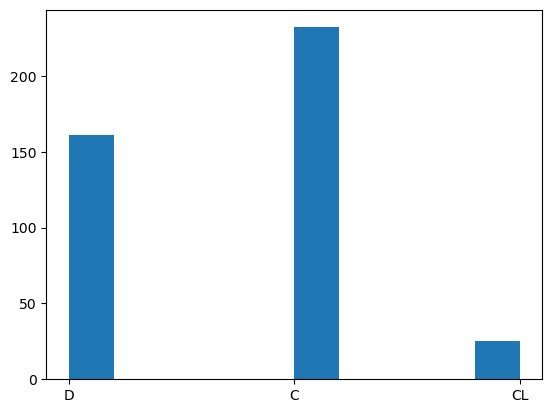

In [6]:
# Visualise the data and answer
# Target variable: Status
plt.hist(cirrdata.Status)

Do any processing of the data that you feel is important for classification downstream?
Yes it has lot of missing values and the target variable also 3 classes and categorical type variable which needs to be
converted to numerical value for fitting in the model

In [7]:
cirrdata.shape

(418, 20)

In [8]:
df= cirrdata
df.shape

(418, 20)

In [9]:
# Convert target variable Status to numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Status = le.fit_transform(df.Status)
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,0,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,0,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,0,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [10]:

#One Hot Encoding
# Converted from string to nominal data type
df = pd.get_dummies(cirrdata, columns = [ 'Drug', 'Sex','Ascites','Hepatomegaly','Spiders','Edema'],dtype=float)
df.head()


,ID,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1,400,2,21464,14.5,261.0,2.60,156.0,1718.0,137.95,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,4500,0,20617,1.1,302.0,4.14,54.0,7394.8,113.52,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3,1012,2,25594,1.4,176.0,3.48,210.0,516.0,96.10,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1925,2,19994,1.8,244.0,2.54,64.0,6121.8,60.63,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,1504,1,13918,3.4,279.0,3.53,143.0,671.0,113.15,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [11]:
# Data Cleaning
# Drop na values

df=df.dropna(inplace=False)

# Drop Index column
df = df.drop(['ID'], axis=1)

df.shape

(276, 26)

In [12]:
df.columns


Index(['N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F',
       'Sex_M', 'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [13]:
#Define X and y
X1 = df.drop(['Status'],axis=1)
y = df.Status
X1.columns


Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M',
       'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [14]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X=scaler.transform(X1)


In [15]:
X= pd.DataFrame(X)
X.columns = X1.columns
X.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,-1.422207,0.853538,2.431300,-0.470471,-2.269029,0.626861,-0.131941,0.244286,0.721609,-0.772071,...,-0.374828,-3.677814,3.677814,-0.971423,0.971423,-1.565248,1.565248,-2.360387,-0.315597,3.903241
1,2.270278,0.632769,-0.486355,-0.295529,1.542337,-0.530800,2.556394,-0.187209,-0.567479,-0.438594,...,-0.374828,0.271901,-0.271901,-0.971423,0.971423,-1.565248,1.565248,0.423659,-0.315597,-0.256197
2,-0.871036,1.930016,-0.421034,-0.833157,-0.091105,1.239740,-0.701166,-0.494890,-1.073906,-1.191607,...,2.667892,0.271901,-0.271901,1.029418,-1.029418,0.638877,-0.638877,-2.360387,3.168596,-0.256197
3,-0.048783,0.470385,-0.333940,-0.543008,-2.417524,-0.417304,1.953545,-1.121379,-0.506093,-0.847372,...,-0.374828,0.271901,-0.271901,-0.971423,0.971423,-1.565248,1.565248,-2.360387,3.168596,-0.256197
4,-0.427938,-1.113314,0.014437,-0.393667,0.032640,0.479316,-0.627763,-0.193744,-0.813019,-1.352966,...,-0.374828,0.271901,-0.271901,-0.971423,0.971423,-1.565248,1.565248,0.423659,-0.315597,-0.256197


In [16]:
# Train and Test
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


In [17]:
#Model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [18]:
# Accuracy on test result
print("Accuracy on training set: {:.3f}".format(tree_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_clf.score(X_test, y_test)))

Accuracy on training set: 0.859
Accuracy on test set: 0.786


In [19]:
y_pred = tree_clf.predict(X_test)
print(f'The accuracy between y test and y predicted is {accuracy_score(y_test, y_pred)}')

The accuracy between y test and y predicted is 0.7857142857142857


#Visualise the data

In [20]:
from sklearn import tree

text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_2 <= -0.30
|   |--- feature_0 <= -1.05
|   |   |--- feature_7 <= -0.76
|   |   |   |--- feature_17 <= 1.70
|   |   |   |   |--- class: 1
|   |   |   |--- feature_17 >  1.70
|   |   |   |   |--- class: 2
|   |   |--- feature_7 >  -0.76
|   |   |   |--- class: 2
|   |--- feature_0 >  -1.05
|   |   |--- feature_6 <= 2.61
|   |   |   |--- feature_15 <= 1.15
|   |   |   |   |--- feature_3 <= 0.13
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  0.13
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_15 >  1.15
|   |   |   |   |--- feature_7 <= -0.88
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  -0.88
|   |   |   |   |   |--- class: 2
|   |   |--- feature_6 >  2.61
|   |   |   |--- feature_5 <= 1.59
|   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  1.59
|   |   |   |   |--- class: 0
|--- feature_2 >  -0.30
|   |--- feature_1 <= -0.53
|   |   |--- feature_5 <= -0.28
|   |   |   |--- feature_0 <= -1.05
|   |   |   |   |---

In [21]:
tree_clf.classes_

array([0, 1, 2])

[Text(0.4717741935483871, 0.9166666666666666, 'x[2] <= -0.301\ngini = 0.561\nsamples = 220\nvalue = [117, 18, 85]'),
 Text(0.20161290322580644, 0.75, 'x[0] <= -1.047\ngini = 0.379\nsamples = 122\nvalue = [93, 5, 24]'),
 Text(0.0967741935483871, 0.5833333333333334, 'x[7] <= -0.763\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.06451612903225806, 0.4166666666666667, 'x[17] <= 1.703\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.03225806451612903, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.0967741935483871, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.12903225806451613, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.3064516129032258, 0.5833333333333334, 'x[6] <= 2.61\ngini = 0.329\nsamples = 116\nvalue = [93, 4, 19]'),
 Text(0.22580645161290322, 0.4166666666666667, 'x[15] <= 1.147\ngini = 0.283\nsamples = 110\nvalue = [92, 4, 14]'),
 Text(0.16129032258064516, 0.25, 'x[3] <= 0.131\ngini = 0.24\nsamples = 104\nv

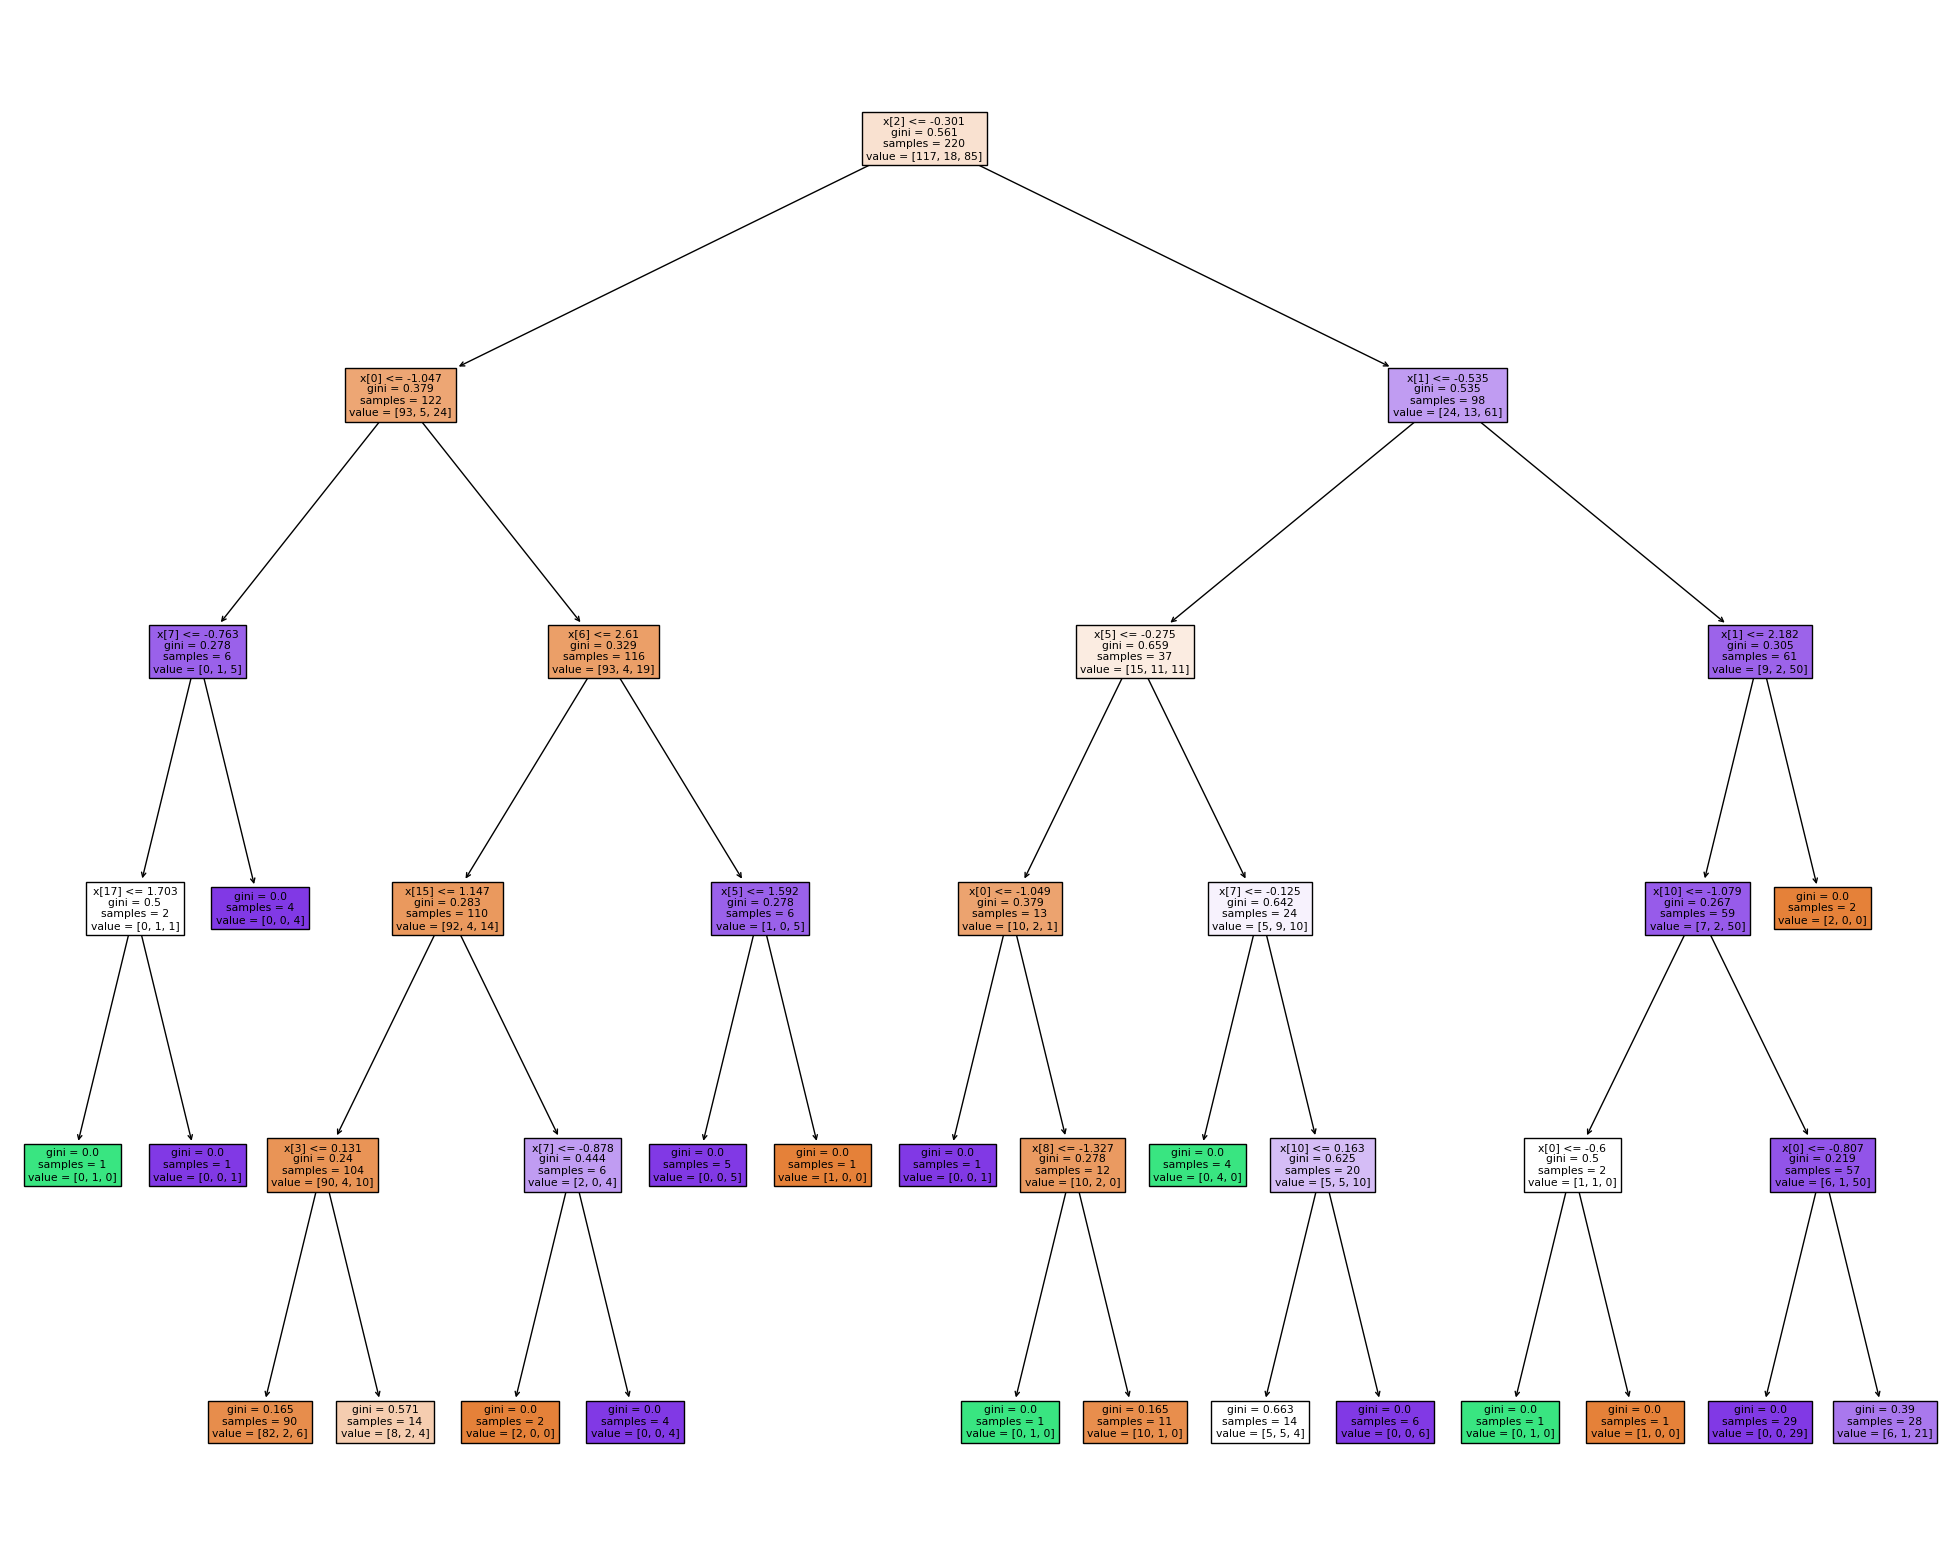

In [22]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_clf, filled=True)

##### Next, compare the performance of decision tree model with the three ensemble methods we learnt in class. Describe your results (10 points) 

# Ensemble methods
1.Bagging
2.Random Forest
3.Boosting

In [23]:
# 1.Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50,
                            max_samples=50, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(bag_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag_clf.score(X_test, y_test)))
y_pred = bag_clf.predict(X_test)
print(f'The accuracy between y test and y predicted is {accuracy_score(y_test, y_pred)}')

Accuracy on training set: 0.823
Accuracy on test set: 0.804
The accuracy between y test and y predicted is 0.8035714285714286


In [24]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50,
                           oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.6863636363636364

In [25]:
#2.Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=25, random_state=42)
RF_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(RF_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RF_clf.score(X_test, y_test)))
y_pred = RF_clf.predict(X_test)
print(f'The accuracy between y test and y predicted is {accuracy_score(y_test, y_pred)}')

Accuracy on training set: 0.995
Accuracy on test set: 0.857
The accuracy between y test and y predicted is 0.8571428571428571


In [26]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=30,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))
y_pred = ada_clf.predict(X_test)
print(f'The accuracy between y test and y predicted is {accuracy_score(y_test, y_pred)}')

Accuracy on training set: 0.891
Accuracy on test set: 0.750
The accuracy between y test and y predicted is 0.75


# Describe the results
1.Decision Tree:Accuracy on test set: 0.786

2.Bagging:Accuracy on test set: 0.804

3.Random Forest:Accuracy on test set: 0.857

4.Boosting:Accuracy on test set: 0.750

Best:3.Random Forest

A Decision Tree is a nonparametric hierarchical model that uses the divide-and-conquer strategy.Decision Tree has variance,poor predictive accuracy due to single tree and difficult to interpret large tree.

With bagging, some training instances may be sampled several times for any given predictor, while others may not be sampled at all and it handles the variance but here score has decreased due to different split.

In Adaboost,the algorithm first trains a base classifier (such as a decision tree) and uses it to make predictions on the trainingset. The algorithm then increases the relative weight of misclassified training instances. Then it trains a secondclassifier, using the updated weights, and again makes predictions on the training set, updates the instance weights,
and so on.It is iterative but not random.


The Random Forest decision trees within the forest are completely independently from each other. The algorithm makes different random choices for each tree to make sure the trees are distinct. 
Suppose that there is one very strong predictor in the data set, along with a number of other moderately strong predictors.

Then in the collection of bagged trees, most or all of the trees will use this strong predictor in the top split. Consequently, all of the bagged trees will look quite similar to each other.Hence the predictions from the bagged trees will be highly correlated. Unfortunately, averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities. In particular, this means that bagging will not lead to a substantial reduction in variance over a single tree in this setting.
Random forests overcome this problem by forcing each split to consider only a subset of the predictors.


##### Choose the best type of classifier and optimize its hyperparamters to get the best performance (10 points)

In [104]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [25,50, 100],
    'max_features': [2, 3,4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [25,50,100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
#Fit
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=25; total time=   0.1s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=25; total time=   0.0s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=25; total time=   0.0s
[CV] END bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=25; total time=   0.1s
[CV] END b

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [25, 50, 100],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [25, 50, 100]},
             verbose=2)

In [101]:
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200)
The best parameter values were: {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}
The best f1-score was: 0.7366407503393804


In [102]:
#Fit
grid_search.fit(X_test, y_test)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total tim

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [105]:
#Finding the best parameter
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: RandomForestClassifier(max_depth=25, max_features=3, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=50)
The best parameter values were: {'bootstrap': True, 'max_depth': 25, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 50}
The best f1-score was: 0.7366407503393804


In [106]:
# finding the test accuracy on the best parameters
best_model = RandomForestClassifier(max_depth=25, max_features=3, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=50)
best_model.fit(X_test,y_test)
print("Accuracy on test set: {:.3f}".format(best_model.score(X_test, y_test)))

Accuracy on test set: 0.893
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=15, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_de

##### Extract the feature importance scores from the chosen model and use only the top 5 features with the best model parameters to create the final model. Report both the training and test accuracy. (5 points)


In [132]:
#feature importance
rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rnd_clf.fit(X, y)
for score, name in zip(rnd_clf.feature_importances_, X.columns):
    print(round(score, 2), name)

0.23 Bilirubin
0.25 N_Days
0.18 Copper
0.16 Prothrombin
0.18 Alk_Phos


# The top 5 features are:
0.25 N_Days
0.23 Bilirubin
0.18 Copper
0.16 Prothrombin
0.18 Alk_Phos



In [133]:
X = pd.DataFrame(df,columns =['Bilirubin','N_Days','Copper','Prothrombin','Alk_Phos'])
X.head()

,Bilirubin,N_Days,Copper,Prothrombin,Alk_Phos
0,14.5,400,156.0,12.2,1718.0
1,1.1,4500,54.0,10.6,7394.8
2,1.4,1012,210.0,12.0,516.0
3,1.8,1925,64.0,10.3,6121.8
4,3.4,1504,143.0,10.9,671.0


In [134]:
X.shape

(276, 5)

In [135]:
y.shape

(276,)

In [138]:
# Train and Test
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


In [139]:
best_model.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(best_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model.score(X_test, y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.857
